## Análise Exploratória de Dados com Pandas
---

Trabalharemos, aqui, com duas bases de dados encontradas no [Kaggle](https://www.kaggle.com/datasets)

1. [**New York City Airbnb Open Data**](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data): Se refere aos dados referentes a Airbnbs na cidade de Nova Iorque, com informações sobre o nome do Airbnb, nome do proprietario, distrito e bairro onde está localizando. Além de informações de latitute e longitude, bem como os tipos dos quartos, preços e outras considerações

2. [**Medical Cost Personal Datasets:**](https://www.kaggle.com/datasets/mirichoi0218/insurance): Trata de uma base com custos médicos pessoais de indivíduos, trazendo informações como idade, genero, IMC, se é fumante, região e o custo em si

Inicialmente, devemos importar as bibliotecas necessárias para o tratamento, análise e visualização dos dados

- **Pandas:**  ferramenta para manipulação e análise de dados em Python. Ela oferece estruturas de dados flexíveis e eficientes, como DataFrames, que permitem a organização, limpeza e transformação de informações. Com suas funções integradas, o pandas simplifica tarefas comuns, como filtragem, agregação e visualização de dados.

- **Matplotlib:** biblioteca de visualização de dados em Python. Com ela, é possível criar gráficos estáticos, interativos e personalizados de forma simples. Possui uma ampla gama de estilos e opções de personalização, permitindo a criação de gráficos de linhas, barras, dispersão, histogramas e muito mais. 

- **Seaborn:** Seaborn é uma biblioteca de visualização de dados em Python construída sobre o Matplotlib. Ela fornece uma interface de alto nível para criar gráficos estatísticos atraentes e informativos. Com sua sintaxe simplificada, é fácil gerar gráficos como histogramas, gráficos de dispersão, boxplots e mapas de calor.

- **Plotly:** Plotly é uma biblioteca de visualização de dados interativa em Python, que oferece recursos de gráficos 2D e 3D. Com Plotly, é possível criar gráficos dinâmicos, interativos e responsivos, permitindo ao usuário explorar e analisar dados de forma mais eficaz.

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point, Polygon

# torna o fundo das figuras plotadas no formato de um grid branco
sns.set_style("whitegrid")

Dados normalmente se encontram em arquivos *.csv*, onde a estrutura de uma tabela é construída com separadores (normalmente, "," ou ";"). Para ler um *.csv* com pandas, basta utilizar o função:

```python
pd.read_csv("nomedoarquivo.csv")
```

Ela retorna um **DataFrame**, estrutura básica do pandas na qual se é possível trabalhar com os dados e manipulá-los de diferentes maneiras. Outra estrutura importante do pandas se chama **Serie**, que representa apenas uma única coluna de dados, sendo o *DataFrame* um conjunto de *Series*. Para visualizar o Dataframe, basta chamar a variável onde este foi salvo. Seguem algumas funções básicas:

```python
dt.head(n = 8) # visualiza as n primeiras linhas da tabela
dt.tail(n = 8) # visualiza as n últimas linhas da tabela
dt.shape # retorna uma tupla com (qnt_linhas, qnt_colunas)
dt['coluna'] # retorna uma Serie correspondente a coluna selecionada
```

A depender do arquivo csv lido, pode ser necessário considerar outros parâmetros da função *read_csv*, como o **sep**, que informa o separador usado no arquivo. Com esse link, é possível encontrar todos os parâmetros com suas descrições:
https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [33]:
nyc_dt = pd.read_csv("ab_nyc.csv")

nyc_dt.head()

,id,name,host_id,host_name,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [34]:
medical_dt = pd.read_csv("insurance.csv", sep = ';')

medical_dt.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Cada coluna de um **DataFrame** representa uma informação sobre a base de dados, podendo possuir diferentes tipos de dados. Na ciência de dados, os tipos de dados mais comuns são:

1. **Dados Numéricos:** São dados que representam valores quantitativos. Eles podem ser subdivididos em:
    - Dados Discretos: Valores inteiros contáveis, como o número de itens vendidos.
    - Dados Contínuos: Valores que podem assumir qualquer número em um intervalo contínuo, como a temperatura ou o peso.

2. **Dados Categóricos:** São dados que representam categorias ou classes. Eles podem ser subdivididos em:
   - Dados Ordinais: Categorias com uma ordem específica, como níveis de satisfação (baixo, médio, alto).
   - Dados Nominais: Categorias sem uma ordem específica, como cores ou tipos de animais.

3. **Dados textuais:** São dados compostos por palavras, frases ou texto completo. Eles são frequentemente tratados de forma especial devido às técnicas específicas necessárias para processamento de linguagem natural (NLP, na sigla em inglês).

4. **Dados Temporais:** São dados que representam informações relacionadas ao tempo.

5. **Dados Binários:** São dados que podem assumir apenas dois valores possíveis, como verdadeiro/falso, sim/não, 0/1.  

### Primeiros Passos

Um possível primeiro passo na exploração dos dados pode ser a busca por problemas na estruturação dos dados na base, como valores faltantes, duplicados ou fora do padrão esperado (outliers).

Uma maneira simples de encontrar dados faltantes em um DataFrame é utilizando duas funções sequencialmente:

```python
dt.isnull().sum()
```

- `isnull()` retorna o mesmo DataFrame, mas substitui as células preenchidas por **True** e as vazias por **False**
- `sum()` retorna uma Serie com o somatório dos valores de cada coluna. Como inicialmente convertemos tudo para True e False, está função funcionará como um contador de valores faltantes nas colunas da base de dados.

Com essa visualização, é possível decidir se há ou não necessidade de excluir as linhas com dados faltantes. 

In [95]:
print(nyc_dt.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
district                              0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


De modo semelhante, podemos procurar a ocorrência de linhas duplicadas no nosso *DataFrame* usando a função *.duplicated*:

- `duplicated()` retorna uma série com todas as linhas da base e com uma coluna informando se a linha em questão tem duplicações ao longo da base (True/False). O parâmetro *keep* refere-se a marcar como True todas as duplicações `keep = False`, apenas as primeiras ocorrências `keep = 'first'` ou últimas `keep = 'last'`.

### Propriedade *.loc* 

A propriedade *.loc* dos DataFrames pandas é uma das mais básicas e fundamentais na manipulação dos dados. Ela permite acessar subconjuntos de linhas e colunas com base em indices (valores, intervalos ou mapeamentos) ou condições, retornando um novo DataFrame ou Serie.

```python

dt.loc[indice] # linha única
dt.loc[[indice1, indice2, indice3]] # conjunto de linhas
dt.loc[indice1:indiceN] # intervalo de linhas

dt.loc[indice, 'nome_col'] # linha única e coluna única
dt.loc[indice1:indiceN, 'nome_col1':'nome_colN'] # intervalo de linhas e de colunas
dt.loc[:, ['nome_col1', 'nome_col2', 'nome_col3']] # todas as linhas de um conjunto de colunas

dt.loc[dt['nome_col'] > valor] # Selecionando por condições, > < == != >= <=
dt.loc[(condicao1) & (condicao2)] # Utilizando operadores logicos (& and, | or, ~ neg)
```

Há também a possibilidade de selecionar através de algum mapeamento, normalmente feito por outra função do pandas, de modo que se tenha uma Serie informando quais linhas serão selecionadas (True) e quais não serão (False)


In [106]:
# Checando os dados duplicados na base de Nova York

nyc_dt.loc[nyc_dt.duplicated(keep = False)]

,id,name,host_id,host_name,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


Uma outra função interessante dos DataFrames é a *describe()*, que retorna uma tabela informando medidas básicas das colunas numéricas, sendo elas:

- **count:** quantidade de dados
- **mean:** média dos valores
- **std:** desvio padrão dos valores
- **min:** menor valor
- **max:** maior valor
- **25%:** valor que divide o conjunto de dados nos 25% menores e 75% maiores
- **50%:** mediana, valor que divide os dados nos 50% menos e 50% maiores
- **75%:** valor que divide os dados nos 75% menores e 25% maiores

In [54]:
medical_dt.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Visualização com Boxplot

Uma forma de visualizar parte dessas medidas gráficamente é com Boxplots, que representam a distribuição dos dados baseado em quartis.

1. **Mínimo:** É o menor valor observado no conjunto de dados, excluindo quaisquer valores considerados outliers.

2. **Primeiro quartil (Q1):** Também conhecido como quartil inferior, é o valor que divide o conjunto de dados em 25% dos valores menores e 75% dos valores maiores. Ou seja, 25% dos valores estão abaixo do Q1.

3. **Mediana:** É o valor que divide o conjunto de dados ao meio, ou seja, 50% dos valores estão abaixo da mediana e 50% estão acima dela. A mediana é representada por uma linha dentro da caixa.

4. **Terceiro quartil (Q3):** Também conhecido como quartil superior, é o valor que divide o conjunto de dados em 75% dos valores menores e 25% dos valores maiores. Ou seja, 75% dos valores estão abaixo do Q3.

5. **Máximo:** É o maior valor observado no conjunto de dados, excluindo quaisquer valores considerados outliers.

Outliers são valores que estão muito distantes dos demais valores e podem indicar pontos fora do padrão esperado. No boxplot, eles são representados como pontos ou asteriscos individuais.

<img src="boxplot.png" alt="drawing" width="60%"/>

Para plotar um Boxplot com a biblioteca Seaborn, podemos utilizar a seguinte função

```python
sns.boxplot(dt, x = 'coluna')
```

Existem inúmeros parâmetros para alteração de cor e orientação da figura. Se usassemos `y = 'coluna'`, a figura seria plotada paralelamente ao eixo Y. A documentação do seaborn apresenta todos os possíveis parâmetros para essa e outras visualizações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

Se visualizarmos o boxplot da coluna *bmi*, que se refere ao IMC (Indice de Massa Corporal) dos indivíduos da base, pode-se notar que, segundo o índice, os dados estão bem distribuídos entre pessoas com peso ideal e acima do peso (< 30) e pessoas com algum grau de obsidade (> 30). Mas, ainda assim, existem alguns outliers, que representam valores de IMC muito distantes da faixa de distribuição. Nessa situação, não podemos considerá-los dados falsos, pois existem pessoas com esses graus altos de IMC no mundo real, mas podem haver situações em que os dados são claramente mentirosos, como idades maiores que 150 anos.

<AxesSubplot: xlabel='bmi'>

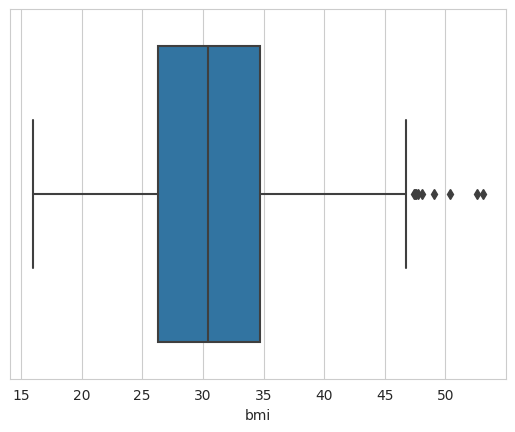

In [98]:
sns.boxplot(medical_dt, x = 'bmi')

### Visualização com Histogramas

Uma outra maneira de visualizar a distribuição dos dados da base é através de histogramas, que representam a distribuição, baseada na contagem de ocorrências de dados em intervalos. Os **intervalos** ou **bins** dividem a faixa de valores em intervalos discretos, sendo representados por barras. Tanto histogramas, quanto boxplots auxiliam na identificação de padrões, tendências e anomalias presentes nos dados.

---

Através de histogramas, podemos indentficar diferentes tipos de distribuição conhecidos na ciência de dados e estatística

<img src="distribuicao.png" alt="drawing" width="60%"/>

1. **Distribuição normal (ou distribuição de Gauss):** A distribuição normal é simétrica e possui uma forma de sino. Nessa distribuição, a média, mediana e moda são todas iguais e estão localizadas no centro da distribuição. Os dados tendem a se concentrar em torno da média e apresentam uma proporção igual de valores acima e abaixo da média. Além disso, muitas técnicas estatísticas assumem que os dados seguem uma distribuição normal.

2. **Distribuição uniforme:** Na distribuição uniforme, todos os valores têm a mesma probabilidade de ocorrer. Essa distribuição é caracterizada por uma reta horizontal e indica que não há preferência ou tendência em relação a nenhum valor específico. As medidas de tendência central, como a média, mediana e moda, são todas iguais e correspondem ao centro do intervalo de valores possíveis.

3. **Distribuição assimétrica à esquerda (ou negativamente assimétrica):** Nessa distribuição, os dados têm uma cauda longa na direção da esquerda e se estendem além da média em direção a valores menores. A média é menor do que a mediana, indicando que há valores extremamente baixos que afetam a média. A moda pode estar localizada à direita da média. Esse tipo de distribuição é menos comum, mas pode ser observado em alguns fenômenos, como o tempo de reação em testes psicológicos.

4. **Distribuição assimétrica à direita (ou positivamente assimétrica):** Nessa distribuição, os dados têm uma cauda longa na direção da direita e se estendem além da média em direção a valores maiores. A média é maior do que a mediana, indicando que há valores extremamente altos que afetam a média. A moda pode estar localizada à esquerda da média. Esse tipo de distribuição é comum em fenômenos como renda, preços de ações ou tempo de resposta de sistemas.


In [109]:
"""
Função que retorna as medidas de tendência central de uma coluna específica
(Média, Moda e Mediana)
"""
def medidas_tendencia_central(data, column):
    print(f"{column.upper()}")
    print(f"Média: {data[column].mean():.3f}")
    print(f"Mediana: {data[column].median():.3f}")
    print(f"Moda: {data[column].mode()[0]:.3f}")

Para plotar um histograma com Seaborn, basta utilizar o seguinte comando:

```python
sns.histplot(dt, x = 'coluna')
```

O parâmetro *x* informa qual coluna do DataFrame será utilizada para a visualização da distribuição. Podemos utilizar o parâmetro `kde = True` para visualizar, além das barras, uma curva que representa o suavização da distribuição. Demais parâmetros podem ser encontrados na documentação: https://seaborn.pydata.org/generated/seaborn.histplot.html

---

Podemos perceber que a distribuição da coluna *charges* (custos médicos individuais cobrados pelo seguro de saúde) é **assimétrica à direita**, o que faz sentido para os dados em questão. Normalmente, é comum que a grande maioria dos indivíduos se concentre na esquerda, com custos baixos com seguro de saúde, enquanto uma pequena parcela tem condições para gastos maiores com seguro de saúde. Nesse caso, a média é maior que a mediana e que a moda, pois o comum é gastos menores com seguro.

<AxesSubplot: xlabel='charges', ylabel='Count'>

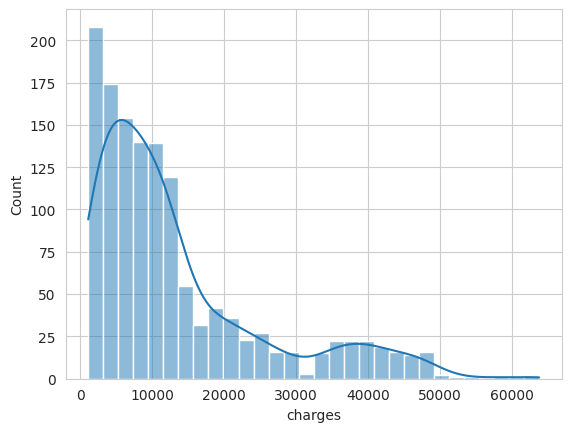

In [82]:
sns.histplot(medical_dt, x = 'charges', kde = True)

In [110]:
# Visualização da média, moda e mediana da coluna "Charges"
medidas_tendencia_central(medical_dt, "charges")

CHARGES
Média: 13270.422
Mediana: 9382.033
Moda: 1639.563


Uma complementação que podemos fazer no gráfico é a visualização das posições de média, moda e mediana. Para isso, podemos utilizar a biblioteca *Matplotlib*, que se conecta ao *Seaborn* pois o mesmo usa ela como base. A função **plt.axvline()** nos permite plotar linhas verticais.

```python
plt.axvline(valor, color='red', linestyle='--', label='etiqueta')
```

O parâmetro label permite que a informação da linha seja adiciona a legenda do gráfico. Enquanto a legenda pode ser plotada com outro comando do matplotlib: `plt.legend()`

> Dica: O comando `plt.figure(figsize = (largura, altura))` pode auxiliar no redimensionamento das figuras geradas. Ele deve ser posicionado antes de se chamar a função principal de desenho da figura

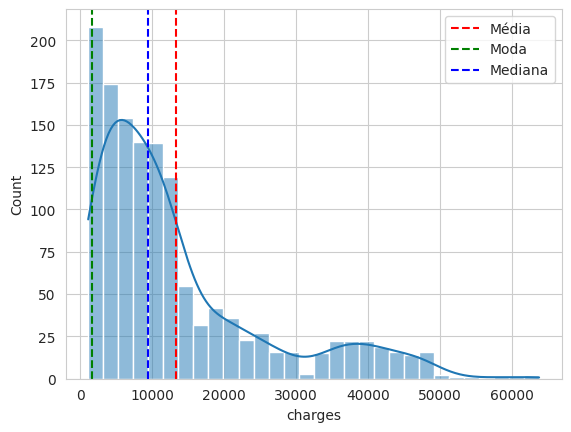

In [113]:
sns.histplot(medical_dt, x = 'charges', kde = True)

plt.axvline(medical_dt['charges'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(medical_dt['charges'].mode()[0], color='green', linestyle='--', label='Moda')
plt.axvline(medical_dt['charges'].median(), color='blue', linestyle='--', label='Mediana')

plt.legend()

Se visualizarmos o histograma da columa *bmi* (IMC), podemos perceber que há uma distribuição muito próxima da **normal**, onde média, mediana e moda se encontram quase que no mesmo lugar e os IMCs se concetram na média entre valores ideais e baixos e valores em algum grau de obesidade.

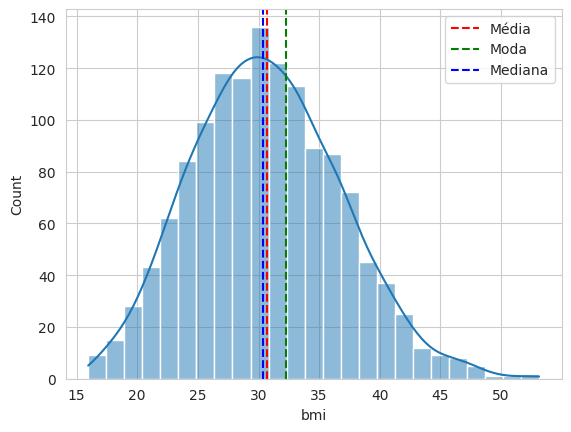

In [84]:
sns.histplot(medical_dt, x = 'bmi', kde = True)

plt.axvline(medical_dt['bmi'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(medical_dt['bmi'].mode()[0], color='green', linestyle='--', label='Moda')
plt.axvline(medical_dt['bmi'].median(), color='blue', linestyle='--', label='Mediana')

plt.legend()

In [67]:
medidas_tendencia_central(medical_dt, 'bmi')

BMI
Média: 30.663
Mediana: 30.400
Moda: 32.300


### Explorando dados com agrupamentos

Algumas dúvidas podem surgir em relação aos dados que temos. Sobre os dados dos Airbnbs de Nova Iorque, podemos nos fazer as seguintes perguntas:

- Qual a quantidade de Airbnbs em cada distrito?
- Nos distritos, qual o valor mínimo permitido de noites é mais comumente encontrado?
- Qual o preço médio em Nova Iorque para os diferentes tipos de quarto?
- Qual o tráfego de pessoas nos Airbnbs em cada distrito?


Para responder essas perguntas, precisamos inicialmente saber todas as categorias disponíveis para as colunas de *tipo de quarto* e *distrito*. Normalmente, as bases vem com dicionários que explicam as colunas e apresentam os tipos em caso de colunas categóricas, mas caso não haja, podemos usar a função `dt['coluna'].unique()`

In [114]:
print(nyc_dt['room_type'].unique())

['Private room' 'Entire home/apt' 'Shared room']


In [115]:
print(nyc_dt['district'].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


**1. Qual a quantidade de Airbnbs em cada distrito?**

Para respondermos essa pergunta, podemos utilizar uma função que calcula a ocorrência das categorias na base de dados:

```python
dt['coluna'].value_counts()
```

Com os dados, é possível ver que quantidade de Airbnbs segue a demanda populacional dos distritos, sendo Manhattan o mais populoso e Staten Island o menos populoso.

https://pt.wikipedia.org/wiki/Nova_Iorque

In [117]:
nyc_dt['district'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: district, dtype: int64

**2. Nos distritos, qual o valor mínimo permitido de noites é mais comumente encontrado?**

Podemos, inicialmente, agrupar os dados por distritos e, para isso, usaremos uma outra fundamental função dos DataFrames pandas, chamada **groupby**

```python
dt.groupby(by = 'coluna', as_index = False)
```

Normalmente é associada a uma função de agregação, que realiza operações sobre os dados agrupados, retornando um novo DataFrame. Podem ser:

1. _Funções de agregação estatística:_
   - `mean()`: Calcula a média dos valores numéricos.
   - `sum()`: Calcula a soma dos valores numéricos.
   - `min()`: Encontra o valor mínimo.
   - `max()`: Encontra o valor máximo.
   - `count()`: Conta o número de ocorrências.
   - `size()`: Retorna o tamanho do grupo (incluindo NaN).
   - `std()`: Calcula o desvio padrão.
   - `var()`: Calcula a variância.
   - `median()`: Calcula a mediana.
   - `quantile(q)`: Calcula o quantil específico (por exemplo, `quantile(0.25)` para o quartil 1).

2. _Funções de agregação personalizadas:_
   - `agg(func)`: Aplica uma função personalizada ao grupo.
   - `apply(func)`: Aplica uma função personalizada ao grupo.


Neste caso, para encontrar o valor mais comum, precisamos da *moda*. Está pode ser aplicada com **agg()**, que recebe uma função personalizada. A função em questão é a pertencente a estrutura *Series* do pandas. Sendo assim:

In [122]:
# Pegando subtabela com colunas "district" e "minimum_nights"
distrito_noites = nyc_dt.loc[:, ['district', 'minimum_nights']]

# Agrupando e agregando pela moda
distrito_noites.groupby(by = 'district', as_index = False).agg(pd.Series.mode)

,district,minimum_nights
0,Bronx,1
1,Brooklyn,2
2,Manhattan,1
3,Queens,1
4,Staten Island,2


**3. Qual o preço médio em Nova Iorque para os diferentes tipos de quarto?**

Para essa pergunta, podemos pegar a subtabela com as colunas de tipos de quarto e preço, agrupar pelos tipos de quarto e então pegar a média, que é aplicada a todas as colunas, mas nesse caso, somente a coluna preço. 

In [125]:
distrito_preco = nyc_dt.loc[:, ['room_type', 'price']]

# a função round(n) arredonda a parte decimal dos valores para n casas decimais
distrito_preco = distrito_preco.groupby(by = 'room_type', as_index = False).mean().round(2)

distrito_preco

,room_type,price
0,Entire home/apt,211.79
1,Private room,89.78
2,Shared room,70.13


Apenas para uma melhor visualização, podemos plotar o que foi encontrado em um gráfico de barras:

```python
sns.barplot(dt, x = 'coluna_no_eixo_x', y = 'coluna_no_eixo_y')
```

<AxesSubplot: xlabel='room_type', ylabel='price'>

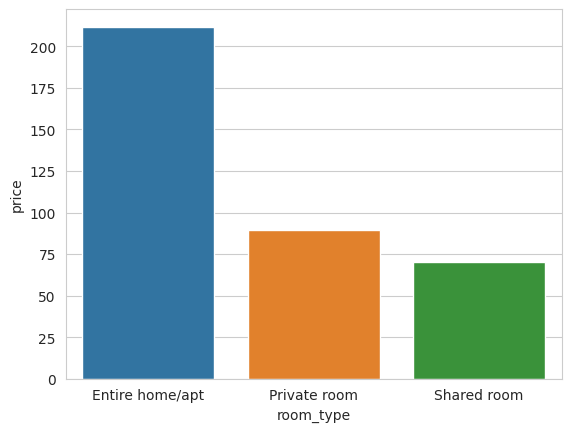

In [88]:
sns.barplot(distrito_preco, x = 'room_type', y = 'price')

**3. Qual o tráfego de pessoas nos Airbnbs em cada distrito?**

Podemos compreender o tráfego como a quantidade de pessoas que normalmente se hospedam nesses Airbnbs. Não há uma informação direta sobre isso, mas podemos utiliza a coluna de reviews por mês para isso, pois compreende-se que quem avaliou o local, esteve lá em algum momento.

Desta forma, podemos perceber que os menos visitados estão em Staten Island e Bronx, justamente pela menor quantidade de airbnbs

In [26]:
dt.loc[:, ['district', 'reviews_per_month']].groupby(by = 'district').sum()

# Considerações
# Bronx -> distrito mais pobre de NYC
# State Island -> distrito menos habitado de NYC
# Manhattan -> centro economico de NYC

,reviews_per_month
neighbourhood_group,
Bronx,1609.94
Brooklyn,21104.98
Manhattan,21158.08
Queens,8879.05
Staten Island,587.99


## Avançando na visualização com dados geográficos

In [26]:
bronx_dt = dt[dt['district'] == 'Bronx']

In [27]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(bronx_dt['longitude'], bronx_dt['latitude'])]

len(geometry)

1091

In [28]:
geo_df = gpd.GeoDataFrame(bronx_dt, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created

/home/jupyter-thiago/fasttext/pyenv/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [29]:
geo_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
171,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2019-07-04,2.04,3,353,POINT (-73.93184 40.83232)
207,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,2019-06-30,1.45,3,323,POINT (-73.93058 40.83075)
260,63588,LL3,295128,Carol Gloria,Bronx,Clason Point,40.81309,-73.85514,Private room,90,2,0,NaN,NaN,7,349,POINT (-73.85514 40.81309)
261,63610,DOMINIQUE'S NY mini efficiency* wifi*metro*quiet,310670,Vie,Bronx,Eastchester,40.88057,-73.83572,Entire home/apt,105,2,38,2019-06-27,0.50,13,365,POINT (-73.83572 40.88057)
309,71812,Condo Apartment with laundry in unit,369015,Thai,Bronx,Kingsbridge,40.87207,-73.90193,Entire home/apt,90,30,4,2019-01-02,0.35,2,346,POINT (-73.90193 40.87207)


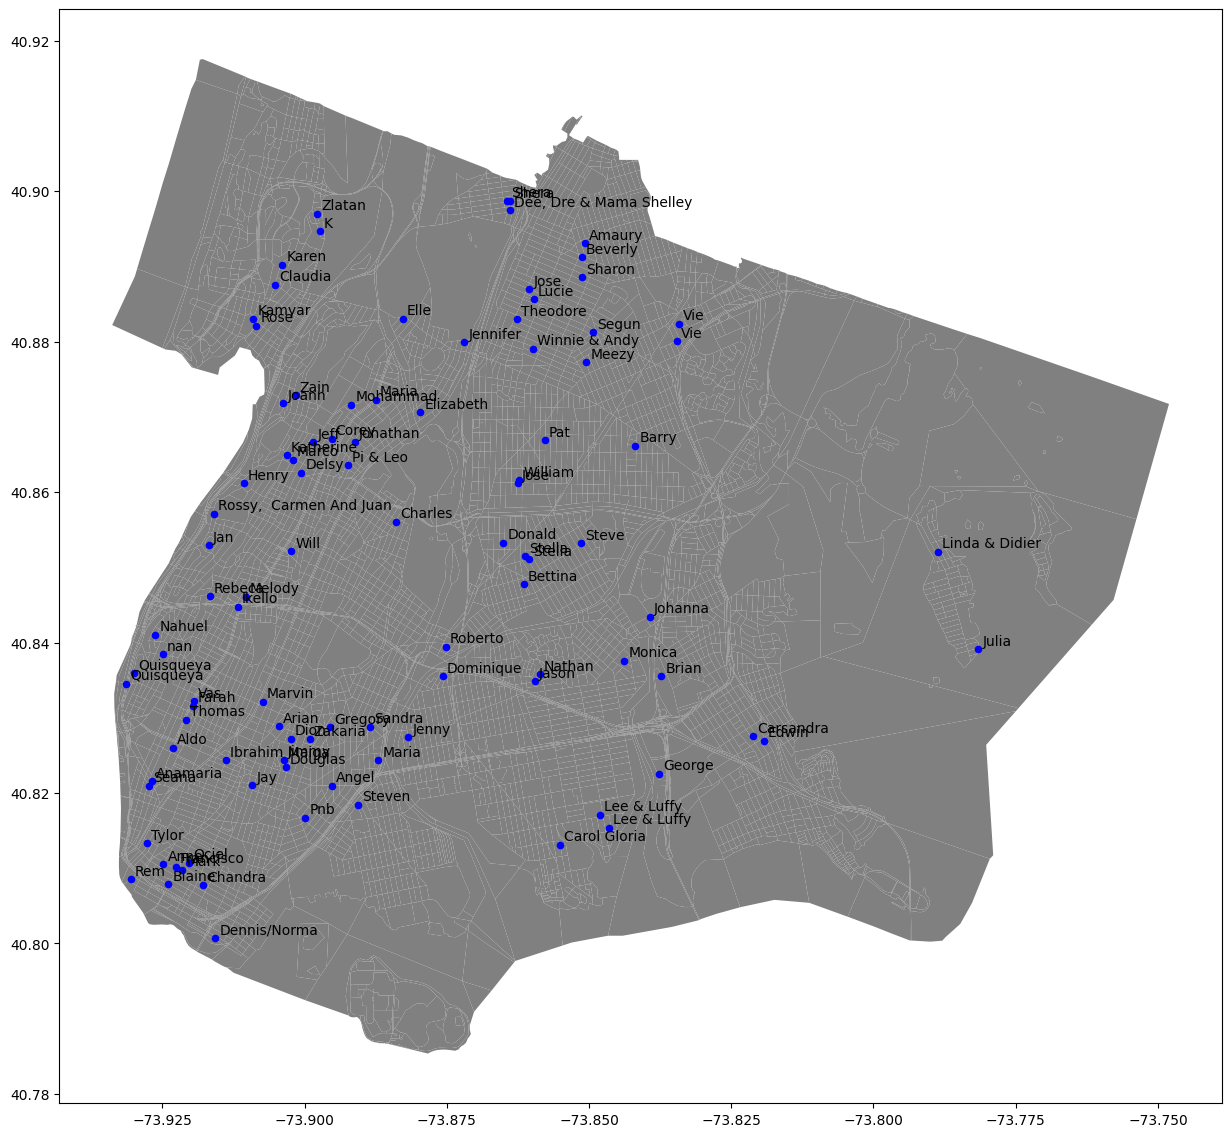

In [30]:
street_map = gpd.read_file("tl_2019_36005_faces.shp")

fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, color = 'grey')

geosample = geo_df.sample(100)

geosample.plot(ax=ax, 
           markersize=20, 
           color='blue', 
           marker='o', 
           label='Pos')

for x, y, label in zip(geosample.geometry.x, geosample.geometry.y, geosample.host_name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")